# **Text Mining Assignment**

# **Assignment 11(a)**

# ***Elon_Musk Dataset(Elon_musk.csv)***

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud

# **Import Dataset**

In [2]:
import pandas as pd
tweet=pd.read_csv('Elon_musk.csv',encoding='latin-1')

In [3]:
tweet

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

# **Explortary Data Analysis**

In [4]:
#droping Unnamed:0
tweet.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
#renaming column text into tweet
tweet.rename(columns={'Text':'text'},inplace=True)

In [6]:
tweet.shape

(1999, 1)

In [7]:
#describing
tweet.describe()

text
count                                               1999
unique                                              1997
top     The most entertaining outcome is the most likely
freq                                                   2

In [8]:
#info
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [9]:
#checking null value is present or not
tweet.isna().sum()

text    0
dtype: int64

In [10]:
#checking duplicates
tweet.duplicated().sum()

2

**Removing extra space for tweet**

In [11]:
tweet=[text.strip() for text in tweet.text]
tweet=[text for text in tweet if text]
tweet[0:25]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

**Joining all tweet, so to form one corpus**

In [12]:
text=''.join(tweet)
text

'@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is 

**Removal of punctuation marks**

In [13]:
no_punc=text.translate(str.maketrans('\x92',"'",string.punctuation))
no_punc

"kunalb11 I'm an alienIDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried itjoerogan Spotify Great interviewgtera27 Doge is underestimatedteslacn Congratulations Tesla China for amazing execution last year Now on to the next for even moreHappy New Year of the Ox httpstco9WFKMYu2ojFrodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrMOwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likelyGiveDirectly Just sent someJust agree to do Clubhouse with kanyewesthttpstco3rWE9uHSTSgeoffkeighley UnrealEngine It's getting realBought some Dogecoin for lil X so he can be a toddler hodlerJoshManMode He definitely has issues but the sentencing seems a bit highfreewalletorg Thanks for fixingfreewalletorg Please unlock my accountAstroJordy U0001F923U0001F923This is true power haha httpstcoFc9uhQSd7Ofreewalletorg Any crypto wallet t

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **Preprocessing**

# **Tokenization**

In [15]:
from nltk.tokenize import word_tokenize
text_token=word_tokenize(no_punc)
print(text_token[0:45])

['kunalb11', 'I', "'m", 'an', 'alienIDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'itjoerogan', 'Spotify', 'Great', 'interviewgtera27', 'Doge', 'is', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'moreHappy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2ojFrodo']


In [16]:
len(text_token)

19390

In [17]:
text_token_df=pd.DataFrame(text_token)
text_token_df.value_counts().head(18)

the       405
to        394
is        358
a         332
of        305
SpaceX    230
amp       218
in        210
for       180
Tesla     156
be        155
's        143
will      137
I         131
on        126
but       115
that      111
it        107
dtype: int64

**Removal of stopwords**

In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words=stopwords.words('english')
stop_words.append('the')
stop_words.append('to')

no_stop_words=[w for w in text_token if not w in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
print(no_stop_words[:45])

['kunalb11', 'I', "'m", 'alienIDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'itjoerogan', 'Spotify', 'Great', 'interviewgtera27', 'Doge', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'moreHappy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2ojFrodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrMOwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10']


In [20]:
len(no_stop_words)

14049

**Normalization of data**

In [21]:
lower_case=[x.lower() for x in no_stop_words]
print(lower_case[:45])

['kunalb11', 'i', "'m", 'alienidaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'itjoerogan', 'spotify', 'great', 'interviewgtera27', 'doge', 'underestimatedteslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'morehappy', 'new', 'year', 'ox', 'httpstco9wfkmyu2ojfrodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrmowensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10']


**Stemming**

In [22]:
#it is use convert to base dictionary word and then chops off the last word
from nltk.stem import PorterStemmer
ps=PorterStemmer()

stem=[ps.stem(w) for w in lower_case]
print(stem[:45])

['kunalb11', 'i', "'m", 'alienidaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'itjoerogan', 'spotifi', 'great', 'interviewgtera27', 'doge', 'underestimatedteslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'morehappi', 'new', 'year', 'ox', 'httpstco9wfkmyu2ojfrodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrmowenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10']


**Lemmatization**

In [23]:
! python -m spacy download en

2023-12-21 10:50:06.444719: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-21 10:50:06.444810: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-21 10:50:06.447245: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-21 10:50:09.495141: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 33.5 MB/s eta 0:00:00
✔ Download and installation successf

In [24]:
nlp=spacy.load('en_core_web_sm')

In [25]:
doc=nlp(' '.join(lower_case))
print(doc[:45])

kunalb11 i 'm alienidaacarmack ray tracing cyberpunk hdr nextlevel have tried itjoerogan spotify great interviewgtera27 doge underestimatedteslacn congratulations tesla china amazing execution last year now next even morehappy new year ox httpstco9wfkmyu2ojfrodo underdoge all thought would fail himself httpstcozgxjfdzzrmowensparks flcnhvy anonyx10 haha thanks flcnhvy


In [26]:
#lemmatization converts the word to base dictionary word
lemmas=[token.lemma_ for token in doc]
print(lemmas[:45])

['kunalb11', 'I', "'", 'm', 'alienidaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'itjoerogan', 'spotify', 'great', 'interviewgtera27', 'doge', 'underestimatedteslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'morehappy', 'new', 'year', 'ox', 'httpstco9wfkmyu2ojfrodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrmowenspark', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy']


In [27]:
print(lemmas[:45])
print(stem[:45])

['kunalb11', 'I', "'", 'm', 'alienidaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'itjoerogan', 'spotify', 'great', 'interviewgtera27', 'doge', 'underestimatedteslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'morehappy', 'new', 'year', 'ox', 'httpstco9wfkmyu2ojfrodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrmowenspark', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy']
['kunalb11', 'i', "'m", 'alienidaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'itjoerogan', 'spotifi', 'great', 'interviewgtera27', 'doge', 'underestimatedteslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'morehappi', 'new', 'year', 'ox', 'httpstco9wfkmyu2ojfrodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrmowenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10']


# **Feature Extraction**

# **1.CountVectorizer**

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
bow=CountVectorizer()
bow_fit=bow.fit_transform(lemmas)
print(bow.vocabulary_)

{'kunalb11': 2850, 'alienidaacarmack': 245, 'ray': 3851, 'trace': 4836, 'cyberpunk': 1007, 'hdr': 1833, 'nextlevel': 3347, 'have': 1829, 'try': 4898, 'itjoerogan': 2738, 'spotify': 4396, 'great': 1731, 'interviewgtera27': 2706, 'doge': 1165, 'underestimatedteslacn': 5095, 'congratulation': 883, 'tesla': 4641, 'china': 767, 'amazing': 273, 'execution': 1410, 'last': 2871, 'year': 5403, 'now': 3392, 'next': 3346, 'even': 1363, 'morehappy': 3247, 'new': 3344, 'ox': 3525, 'httpstco9wfkmyu2ojfrodo': 2021, 'underdoge': 5094, 'all': 248, 'thought': 4730, 'would': 5366, 'fail': 1448, 'himself': 1881, 'httpstcozgxjfdzzrmowenspark': 2535, 'flcnhvy': 1531, 'anonyx10': 303, 'haha': 1771, 'thanks': 4682, 'indeed': 2632, 'tweet': 4918, 'definitely': 1063, 'represent': 3933, 'realworld': 3879, 'time': 4751, 'allocationthe': 252, 'entertaining': 1318, 'outcome': 3498, 'likelygivedirectly': 2940, 'just': 2801, 'send': 4134, 'somejust': 4308, 'agree': 216, 'clubhouse': 802, 'kanyewesthttpstco3rwe9uhstsg

In [29]:
df_bow=pd.DataFrame(bow.vocabulary_,columns=bow.vocabulary_.keys(),index=[0])
df_bow.from_records([bow.vocabulary_]).T.sort_values(0,ascending=False).head(10)

0
ðogecoin             5492
zzcool               5491
zonrt                5490
zone                 5489
zogfotpik            5488
zip2                 5487
zerotrungtphan       5486
zerocerberu21014829  5485
zero                 5484
zenit                5483

In [30]:
print(bow.get_feature_names_out()[145:205])
print(bow_fit.toarray()[145:205])

['absorption' 'absurd' 'absurdly' 'absurdtesmaniancom' 'ac' 'academia'
 'accel' 'accelera' 'accelerate' 'acceleratingrt' 'acceleration'
 'accelerator' 'accept' 'acceptable' 'acceptteslagong' 'access'
 'accessible' 'accident' 'accidental' 'accommodate' 'accountastrojordy'
 'accura' 'accuracy' 'accurate' 'accurateajtourville'
 'accuratebluemoondance74' 'accurateerdayastronaut' 'accurateevafoxu'
 'ace' 'achieve' 'achievement' 'achy' 'across' 'action' 'active'
 'activity' 'actual' 'actuall' 'actually' 'actuary' 'adagio' 'adamklotz'
 'add' 'additive' 'address' 'addressedppathole' 'administer' 'adult'
 'advanc' 'advance' 'advanced' 'advantage' 'adventure' 'advertise'
 'advice' 'advise' 'aero' 'afb' 'affair' 'affect']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
print(bow.get_feature_names_out().shape)
print(bow_fit.toarray().shape)

(5493,)
(14106, 5493)


# **2.CountVectorizer with N-gram(Bigram,Trigram)**

In [32]:
bow1=CountVectorizer(analyzer='word',ngram_range=(2,3),max_features=100)
bow1_fit=bow1.fit_transform(tweet)
bow1_fit

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 1890 stored elements in Compressed Sparse Row format>

In [33]:
bow1.vocabulary_.keys()

dict_keys(['to the', 'of the', 'https co', 'the most', 'is the', 'most likely', 'thanks for', '0001f923 0001f923', 'this is', 'should be', 'rt spacex', 'the first', 'to https', 'to https co', 'to be', 'at tesla', 'you re', 'is not', 'the people', 'the future', 'spacex falcon', 'rt spacex falcon', 'to orbit', 'erdayastronaut spacex', 'it was', 'need to', 'it will', 'will be', 'it will be', 'giga berlin', 'hard to', 'going to', 'if you', 'for the', 'lot of', 'we are', 'is what', 'would be', 'that is', 'we re', 'tesla is', 'will have', 'it should', 'falcon first', 'first stage', 'has landed', 'on the', 'of course', 'spacex falcon first', 'falcon first stage', 'next week', 'it is', 'pretty much', 'that would', 'to make', 'the best', 'tobyliiiiiiiiii erdayastronaut', 'for sure', 'you can', 'one day', 'we will', 'in the', 'from the', 'the space_station', 'there are', 'they re', 'way to', 'one of', 'flcnhvy tesla', 'but it', 'rt tesla', 'we have', 'erdayastronaut flcnhvy', 'it https', 'it htt

In [34]:
bow1.vocabulary_

{'to the': 84,
 'of the': 44,
 'https co': 23,
 'the most': 70,
 'is the': 28,
 'most likely': 40,
 'thanks for': 64,
 '0001f923 0001f923': 0,
 'this is': 77,
 'should be': 55,
 'rt spacex': 52,
 'the first': 68,
 'to https': 80,
 'to https co': 81,
 'to be': 78,
 'at tesla': 1,
 'you re': 99,
 'is not': 27,
 'the people': 71,
 'the future': 69,
 'spacex falcon': 57,
 'rt spacex falcon': 53,
 'to orbit': 83,
 'erdayastronaut spacex': 10,
 'it was': 34,
 'need to': 41,
 'it will': 35,
 'will be': 95,
 'it will be': 36,
 'giga berlin': 19,
 'hard to': 21,
 'going to': 20,
 'if you': 24,
 'for the': 17,
 'lot of': 39,
 'we are': 90,
 'is what': 29,
 'would be': 97,
 'that is': 65,
 'we re': 93,
 'tesla is': 61,
 'will have': 96,
 'it should': 33,
 'falcon first': 11,
 'first stage': 14,
 'has landed': 22,
 'on the': 45,
 'of course': 43,
 'spacex falcon first': 58,
 'falcon first stage': 12,
 'next week': 42,
 'it is': 32,
 'pretty much': 49,
 'that would': 66,
 'to make': 82,
 'the best'

In [35]:
print(bow1.get_feature_names_out())
print(bow1_fit.toarray())

['0001f923 0001f923' 'at tesla' 'be great' 'but it' 'but we' 'coming soon'
 'crew dragon' 'ercxspace spacex' 'erdayastronaut flcnhvy'
 'erdayastronaut rweb11742' 'erdayastronaut spacex' 'falcon first'
 'falcon first stage' 'first operational' 'first stage' 'flcnhvy tesla'
 'for sure' 'for the' 'from the' 'giga berlin' 'going to' 'hard to'
 'has landed' 'https co' 'if you' 'in the' 'is https' 'is not' 'is the'
 'is what' 'it https' 'it https co' 'it is' 'it should' 'it was' 'it will'
 'it will be' 'jgrano305 teslaratiteam'
 'jgrano305 teslaratiteam teslarati' 'lot of' 'most likely' 'need to'
 'next week' 'of course' 'of the' 'on the' 'one day' 'one of'
 'ppathole thesheetztweetz waemd' 'pretty much' 'raytech247 wholemarsblog'
 'rt nasa' 'rt spacex' 'rt spacex falcon' 'rt tesla' 'should be'
 'spacex crew' 'spacex falcon' 'spacex falcon first'
 'spacex spacexstarlink' 'static fire' 'tesla is' 'teslarati tesla'
 'teslaratiteam teslarati' 'thanks for' 'that is' 'that would' 'the best'
 'the

# **3.Tfidf-Vectorizer**

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
tfidf=TfidfVectorizer()
tfidf_fit=tfidf.fit_transform(lemmas)
tfidf_fit
tfidf.vocabulary_

{'kunalb11': 2850,
 'alienidaacarmack': 245,
 'ray': 3851,
 'trace': 4836,
 'cyberpunk': 1007,
 'hdr': 1833,
 'nextlevel': 3347,
 'have': 1829,
 'try': 4898,
 'itjoerogan': 2738,
 'spotify': 4396,
 'great': 1731,
 'interviewgtera27': 2706,
 'doge': 1165,
 'underestimatedteslacn': 5095,
 'congratulation': 883,
 'tesla': 4641,
 'china': 767,
 'amazing': 273,
 'execution': 1410,
 'last': 2871,
 'year': 5403,
 'now': 3392,
 'next': 3346,
 'even': 1363,
 'morehappy': 3247,
 'new': 3344,
 'ox': 3525,
 'httpstco9wfkmyu2ojfrodo': 2021,
 'underdoge': 5094,
 'all': 248,
 'thought': 4730,
 'would': 5366,
 'fail': 1448,
 'himself': 1881,
 'httpstcozgxjfdzzrmowenspark': 2535,
 'flcnhvy': 1531,
 'anonyx10': 303,
 'haha': 1771,
 'thanks': 4682,
 'indeed': 2632,
 'tweet': 4918,
 'definitely': 1063,
 'represent': 3933,
 'realworld': 3879,
 'time': 4751,
 'allocationthe': 252,
 'entertaining': 1318,
 'outcome': 3498,
 'likelygivedirectly': 2940,
 'just': 2801,
 'send': 4134,
 'somejust': 4308,
 'agree':

In [38]:
df_tfidf=pd.DataFrame(tfidf.vocabulary_,columns=tfidf.vocabulary_.keys(),index=[0])
df_tfidf.from_records([tfidf.vocabulary_]).T.sort_values(0,ascending=False).head(10)

0
ðogecoin             5492
zzcool               5491
zonrt                5490
zone                 5489
zogfotpik            5488
zip2                 5487
zerotrungtphan       5486
zerocerberu21014829  5485
zero                 5484
zenit                5483

In [39]:
print(tfidf.get_feature_names_out()[145:205])
print(tfidf_fit.toarray()[145:205])

['absorption' 'absurd' 'absurdly' 'absurdtesmaniancom' 'ac' 'academia'
 'accel' 'accelera' 'accelerate' 'acceleratingrt' 'acceleration'
 'accelerator' 'accept' 'acceptable' 'acceptteslagong' 'access'
 'accessible' 'accident' 'accidental' 'accommodate' 'accountastrojordy'
 'accura' 'accuracy' 'accurate' 'accurateajtourville'
 'accuratebluemoondance74' 'accurateerdayastronaut' 'accurateevafoxu'
 'ace' 'achieve' 'achievement' 'achy' 'across' 'action' 'active'
 'activity' 'actual' 'actuall' 'actually' 'actuary' 'adagio' 'adamklotz'
 'add' 'additive' 'address' 'addressedppathole' 'administer' 'adult'
 'advanc' 'advance' 'advanced' 'advantage' 'adventure' 'advertise'
 'advice' 'advise' 'aero' 'afb' 'affair' 'affect']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [40]:
print(tfidf.get_feature_names_out().shape)
print(tfidf_fit.toarray().shape)

(5493,)
(14106, 5493)


# **4.Tfidf-Vectorizer with N-gram(Bigram,Trigram)**

In [41]:
tfidf1=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(2,3),max_features=100)
tfidf1_fit=tfidf1.fit_transform(tweet)
tfidf1_fit

<1999x100 sparse matrix of type '<class 'numpy.float64'>'
	with 1890 stored elements in Compressed Sparse Row format>

In [42]:
tfidf1.vocabulary_

{'to the': 84,
 'of the': 44,
 'https co': 23,
 'the most': 70,
 'is the': 28,
 'most likely': 40,
 'thanks for': 64,
 '0001f923 0001f923': 0,
 'this is': 77,
 'should be': 55,
 'rt spacex': 52,
 'the first': 68,
 'to https': 80,
 'to https co': 81,
 'to be': 78,
 'at tesla': 1,
 'you re': 99,
 'is not': 27,
 'the people': 71,
 'the future': 69,
 'spacex falcon': 57,
 'rt spacex falcon': 53,
 'to orbit': 83,
 'erdayastronaut spacex': 10,
 'it was': 34,
 'need to': 41,
 'it will': 35,
 'will be': 95,
 'it will be': 36,
 'giga berlin': 19,
 'hard to': 21,
 'going to': 20,
 'if you': 24,
 'for the': 17,
 'lot of': 39,
 'we are': 90,
 'is what': 29,
 'would be': 97,
 'that is': 65,
 'we re': 93,
 'tesla is': 61,
 'will have': 96,
 'it should': 33,
 'falcon first': 11,
 'first stage': 14,
 'has landed': 22,
 'on the': 45,
 'of course': 43,
 'spacex falcon first': 58,
 'falcon first stage': 12,
 'next week': 42,
 'it is': 32,
 'pretty much': 49,
 'that would': 66,
 'to make': 82,
 'the best'

In [43]:
tfidf1.vocabulary_.keys()

dict_keys(['to the', 'of the', 'https co', 'the most', 'is the', 'most likely', 'thanks for', '0001f923 0001f923', 'this is', 'should be', 'rt spacex', 'the first', 'to https', 'to https co', 'to be', 'at tesla', 'you re', 'is not', 'the people', 'the future', 'spacex falcon', 'rt spacex falcon', 'to orbit', 'erdayastronaut spacex', 'it was', 'need to', 'it will', 'will be', 'it will be', 'giga berlin', 'hard to', 'going to', 'if you', 'for the', 'lot of', 'we are', 'is what', 'would be', 'that is', 'we re', 'tesla is', 'will have', 'it should', 'falcon first', 'first stage', 'has landed', 'on the', 'of course', 'spacex falcon first', 'falcon first stage', 'next week', 'it is', 'pretty much', 'that would', 'to make', 'the best', 'tobyliiiiiiiiii erdayastronaut', 'for sure', 'you can', 'one day', 'we will', 'in the', 'from the', 'the space_station', 'there are', 'they re', 'way to', 'one of', 'flcnhvy tesla', 'but it', 'rt tesla', 'we have', 'erdayastronaut flcnhvy', 'it https', 'it htt

In [44]:
print(tfidf1.get_feature_names_out())
print(tfidf1_fit.toarray())

['0001f923 0001f923' 'at tesla' 'be great' 'but it' 'but we' 'coming soon'
 'crew dragon' 'ercxspace spacex' 'erdayastronaut flcnhvy'
 'erdayastronaut rweb11742' 'erdayastronaut spacex' 'falcon first'
 'falcon first stage' 'first operational' 'first stage' 'flcnhvy tesla'
 'for sure' 'for the' 'from the' 'giga berlin' 'going to' 'hard to'
 'has landed' 'https co' 'if you' 'in the' 'is https' 'is not' 'is the'
 'is what' 'it https' 'it https co' 'it is' 'it should' 'it was' 'it will'
 'it will be' 'jgrano305 teslaratiteam'
 'jgrano305 teslaratiteam teslarati' 'lot of' 'most likely' 'need to'
 'next week' 'of course' 'of the' 'on the' 'one day' 'one of'
 'ppathole thesheetztweetz waemd' 'pretty much' 'raytech247 wholemarsblog'
 'rt nasa' 'rt spacex' 'rt spacex falcon' 'rt tesla' 'should be'
 'spacex crew' 'spacex falcon' 'spacex falcon first'
 'spacex spacexstarlink' 'static fire' 'tesla is' 'teslarati tesla'
 'teslaratiteam teslarati' 'thanks for' 'that is' 'that would' 'the best'
 'the

# **Generate WordCloud**

In [45]:
from wordcloud import WordCloud,STOPWORDS

In [46]:
#def plot for word cloud
def plot_cloud(wordcloud):
  plt.figure(figsize=(40,30))
  plt.imshow(wordcloud)
  plt.axis('off');

wordcloud=WordCloud(width=3000,height=2000,background_color='black',colormap='Set2',max_words=100).generate(text)

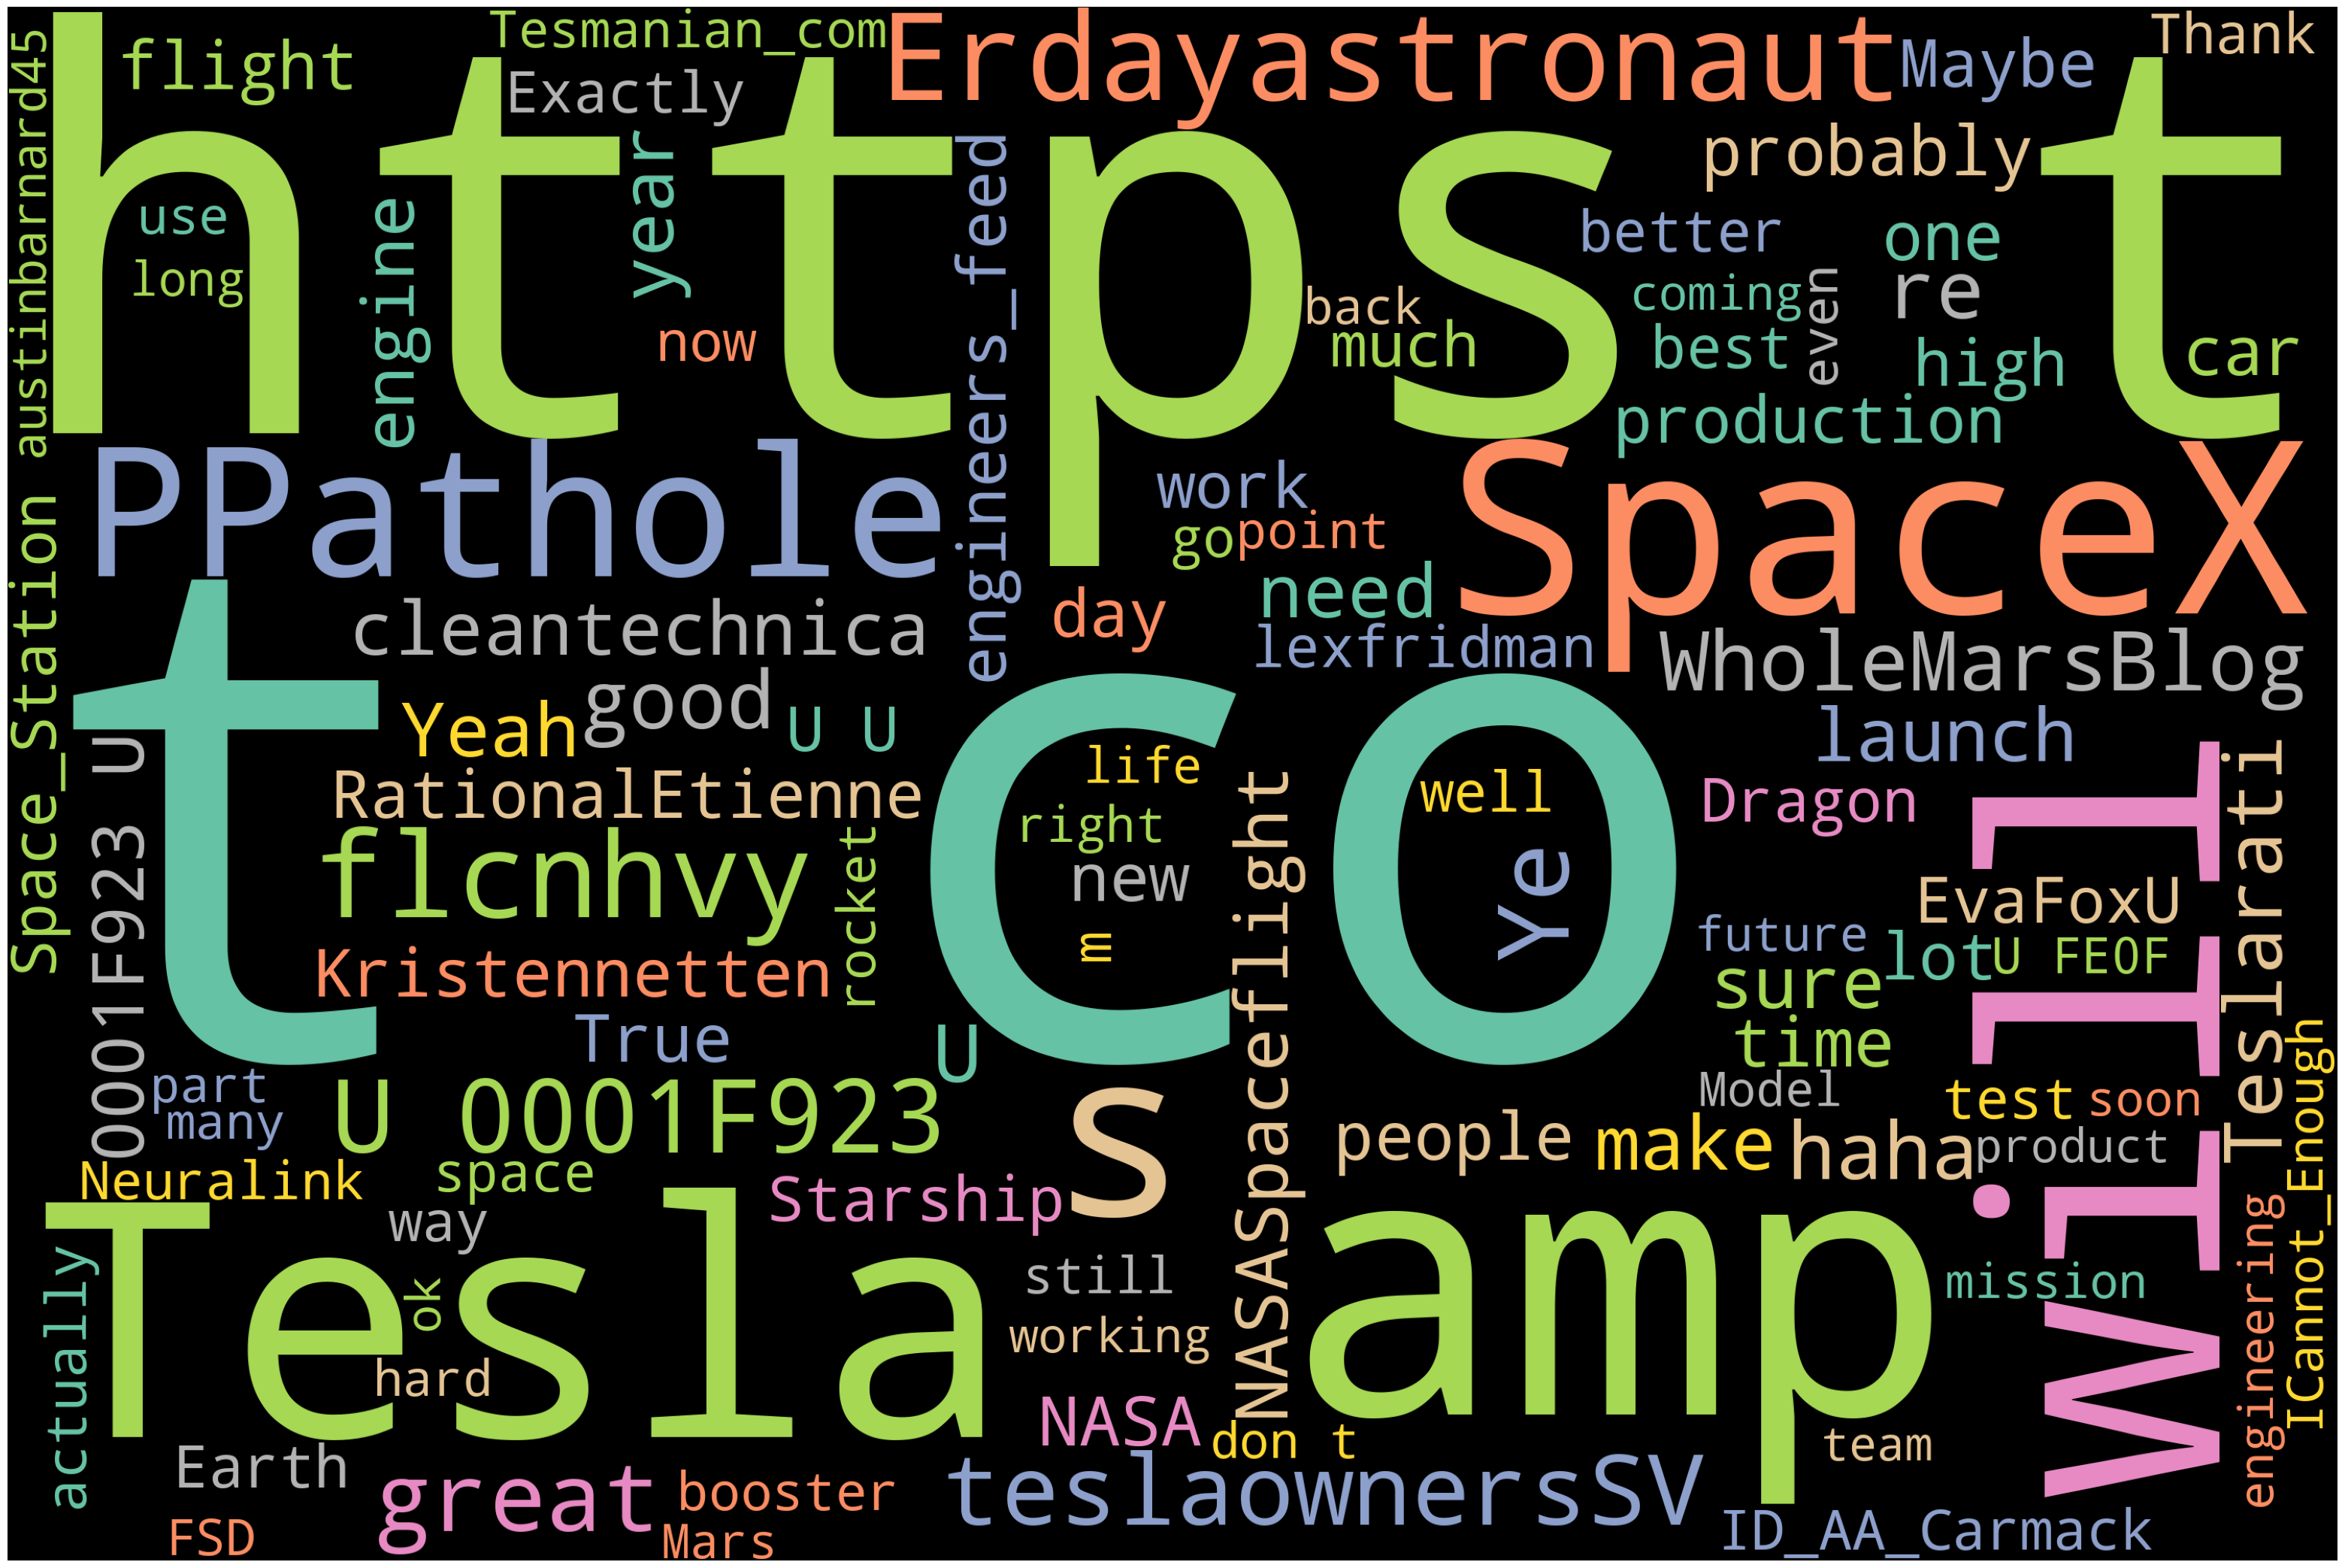

In [47]:
#plot
plot_cloud(wordcloud)

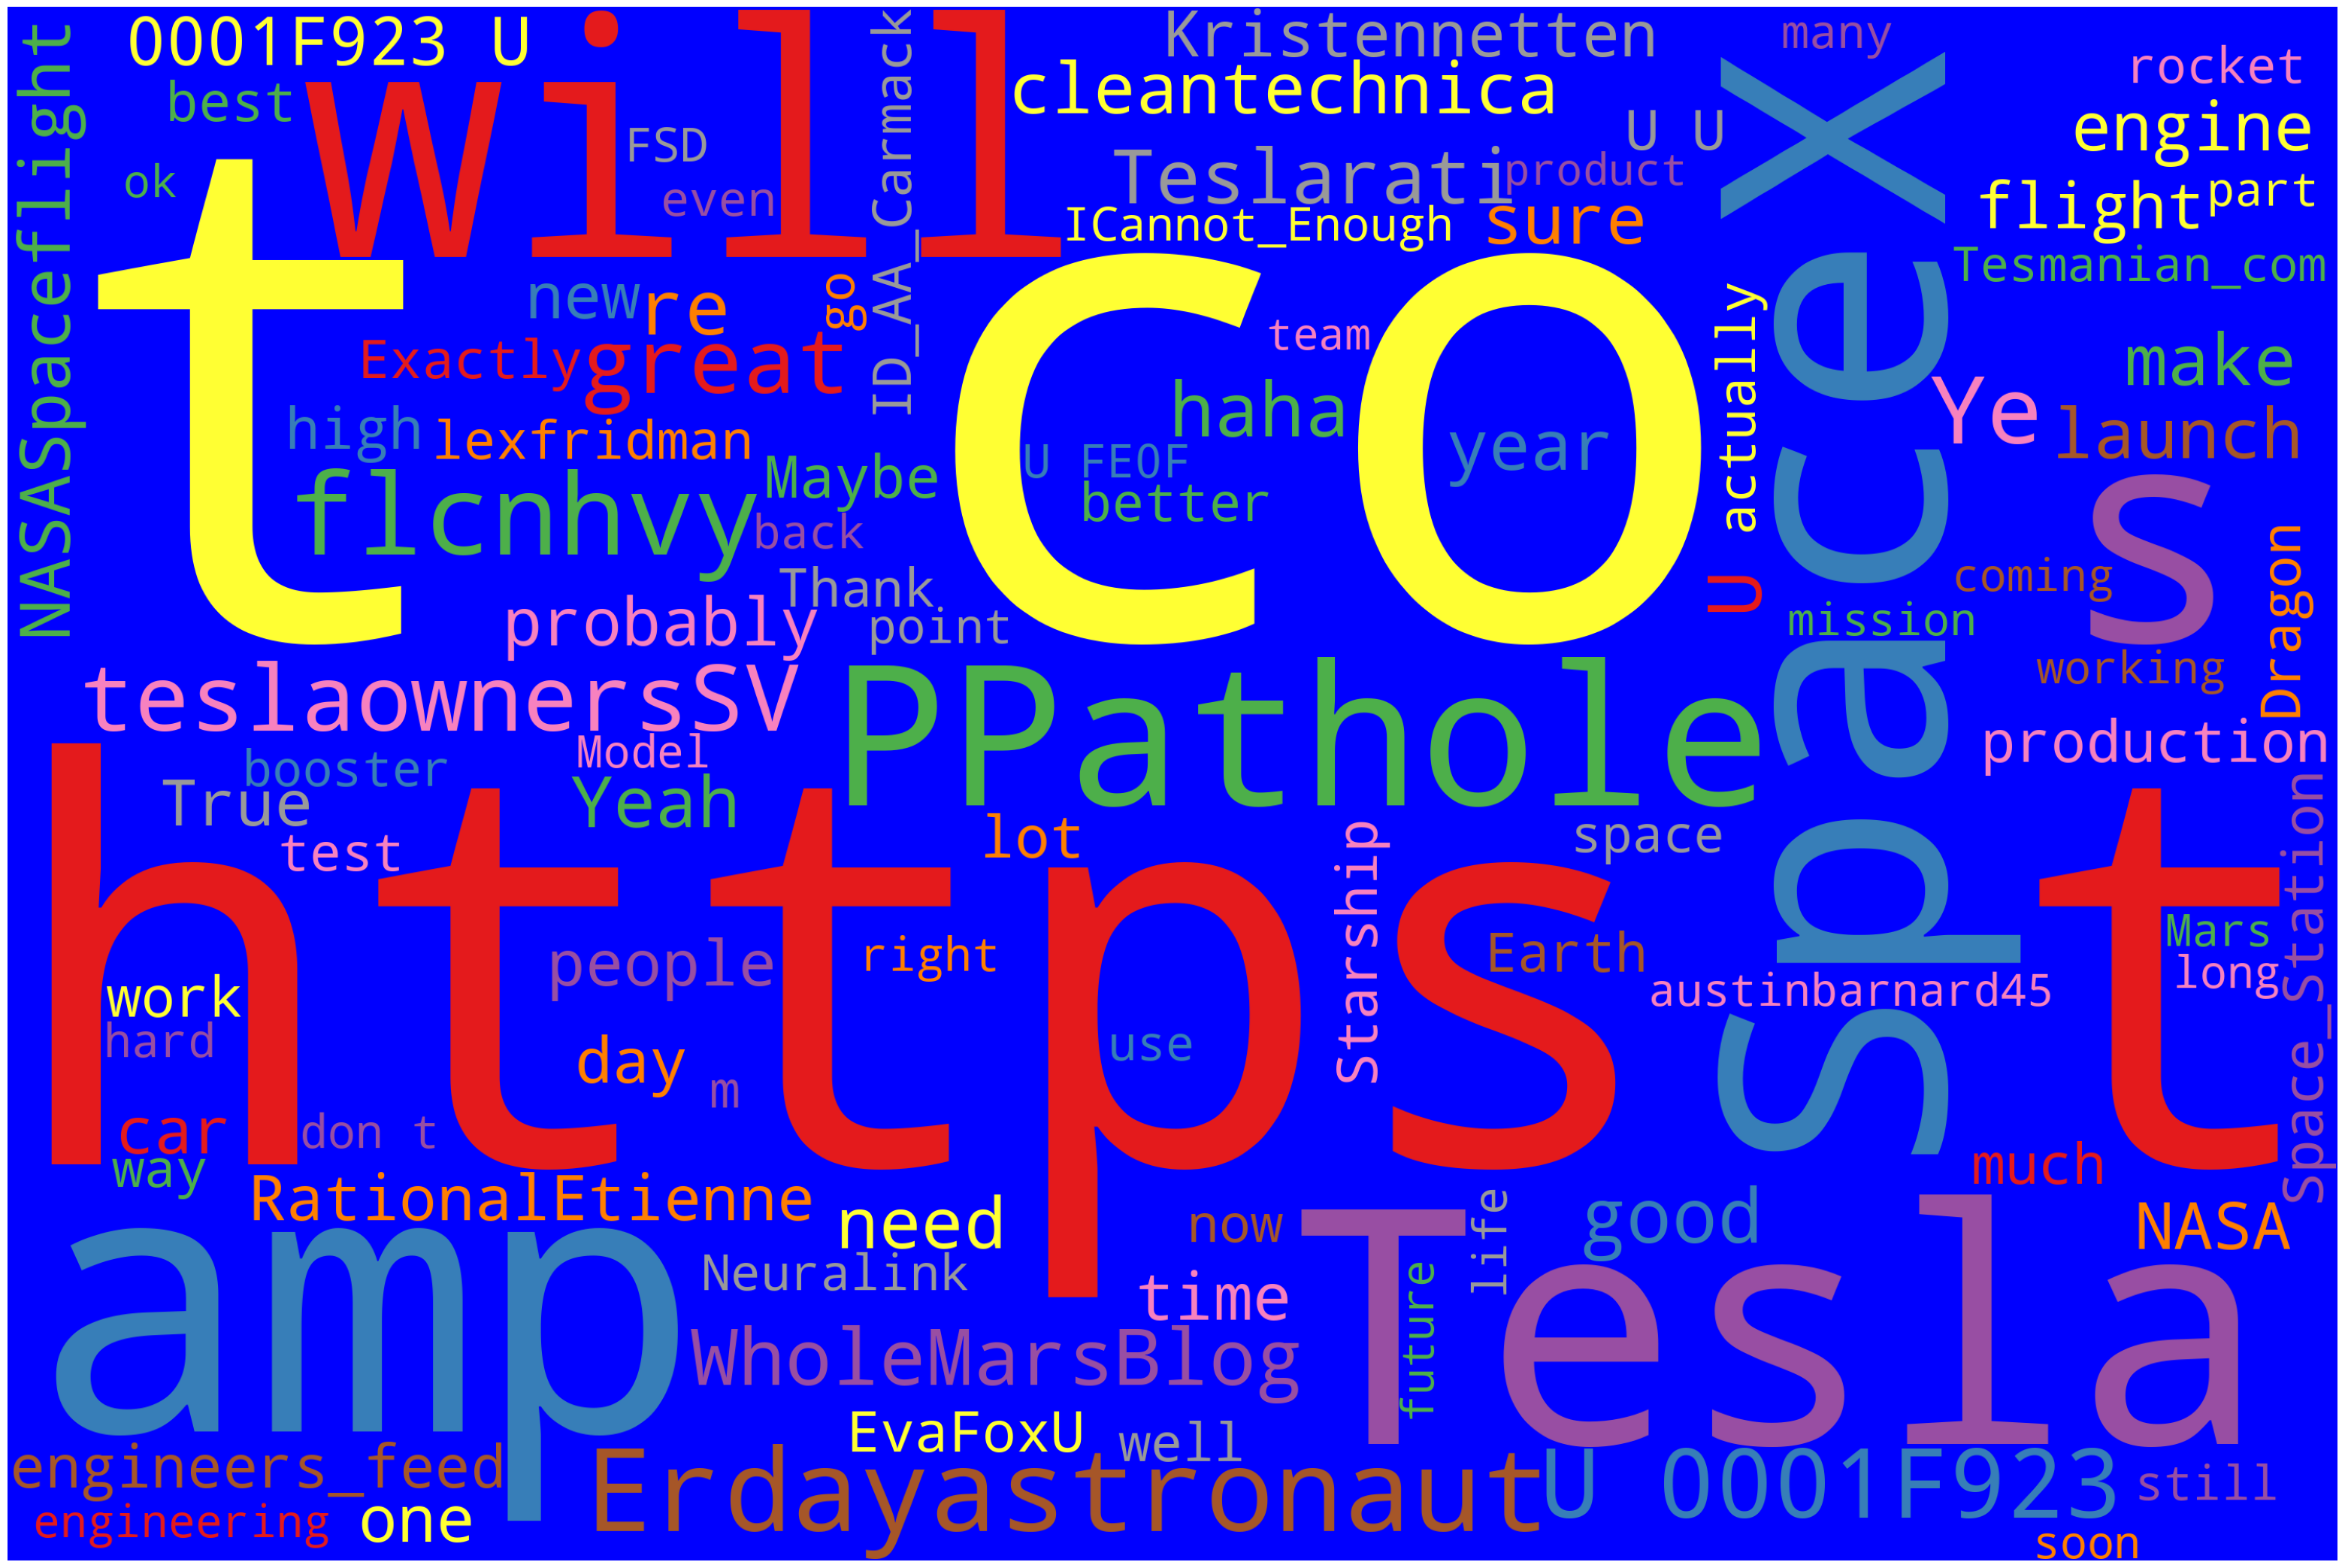

In [48]:
wordcloud=WordCloud(width=3000,height=2000,background_color='blue',colormap='Set1',max_words=100).generate(text)
plot_cloud(wordcloud)

# **Named Entity Recognition**

In [49]:
import pandas
tweet2=pd.read_csv('Elon_musk.csv',encoding='latin-1')

In [50]:
tweet2.rename(columns={'Text':'text'},inplace=True)
tweet2.drop('Unnamed: 0',axis=1,inplace=True)

In [51]:
tweet2

text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

In [52]:
#remove extra space
tweet2=[text.strip() for text in tweet2.text]
tweet2=[text for text in tweet2 if text]
tweet2[0:18]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [53]:
#join to corpus
tweet2=''.join(tweet2)
tweet2=tweet2.translate(str.maketrans('\x92',"'",string.punctuation))
tweet2

"kunalb11 I'm an alienIDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried itjoerogan Spotify Great interviewgtera27 Doge is underestimatedteslacn Congratulations Tesla China for amazing execution last year Now on to the next for even moreHappy New Year of the Ox httpstco9WFKMYu2ojFrodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrMOwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likelyGiveDirectly Just sent someJust agree to do Clubhouse with kanyewesthttpstco3rWE9uHSTSgeoffkeighley UnrealEngine It's getting realBought some Dogecoin for lil X so he can be a toddler hodlerJoshManMode He definitely has issues but the sentencing seems a bit highfreewalletorg Thanks for fixingfreewalletorg Please unlock my accountAstroJordy U0001F923U0001F923This is true power haha httpstcoFc9uhQSd7Ofreewalletorg Any crypto wallet t

In [54]:
#Entity Tagging
nlp=spacy.load('en_core_web_sm')

In [55]:
one_block=tweet2
doc_block=nlp(str(one_block))
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [56]:
for token in doc_block[245:295]:
  print(token.pos_)

PRON
AUX
VERB
PART
AUX
DET
ADJ
NOUN
ADP
DET
NOUN
ADJ
NOUN
AUX
AUX
NOUN
NOUN
NOUN
PRON
AUX
VERB
ADP
PROPN
CCONJ
PRON
AUX
AUX
DET
NOUN
PRON
VERB
ADP
PROPN
PROPN
PROPN
PROPN
NOUN
PROPN
NOUN
AUX
VERB
DET
NUM
PROPN
NOUN
NOUN
NOUN
PROPN
PRON
ADP


In [57]:
for token in doc_block[245:295]:
  print(token,':',token.pos_)

It : PRON
's : AUX
meant : VERB
to : PART
be : AUX
the : DET
same : ADJ
price : NOUN
in : ADP
all : DET
countries : NOUN
Only : ADJ
difference : NOUN
should : AUX
be : AUX
taxes : NOUN
amp : NOUN
shippingtobyliiiiiiiiii : NOUN
This : PRON
is : AUX
intended : VERB
for : ADP
Earth : PROPN
but : CCONJ
there : PRON
may : AUX
be : AUX
some : DET
ideas : NOUN
that : PRON
apply : VERB
to : ADP
Mars : PROPN
tooCryptoShrikar : PROPN
CoinDesk : PROPN
Tesla : PROPN
DanZPalmer : NOUN
U0001F923U0001F923XPrize : PROPN
team : NOUN
will : AUX
manage : VERB
the : DET
100 : NUM
M : PROPN
carbon : NOUN
capture : NOUN
prize : NOUN
httpstcofSw5IanL0rSRuhle : PROPN
Everyone : PRON
at : ADP


In [58]:
#filter nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
nouns_verbs

['tracing',
 'nextlevel',
 'tried',
 'itjoerogan',
 'Spotify',
 'interviewgtera27',
 'underestimatedteslacn',
 'execution',
 'year',
 'thought',
 'fail',
 'httpstcozGxJFDzzrMOwenSparks',
 'represent',
 'realworld',
 'time',
 'outcome',
 'sent',
 'agree',
 'do',
 'getting',
 'realBought',
 'lil',
 'toddler',
 'hodlerJoshManMode',
 'has',
 'issues',
 'sentencing',
 'seems',
 'bit',
 'Thanks',
 'fixingfreewalletorg',
 'unlock',
 'U0001F923U0001F923This',
 'power',
 'haha',
 'wallet',
 'give',
 'keys',
 'avoided',
 'app',
 'sucksRT',
 'selected',
 'launch',
 'elements',
 'Gateway',
 'mission',
 'predict',
 'cash',
 'flow',
 'IPORationalEtienne',
 'endeavor',
 'don',
 'needs',
 'pass',
 'chasm',
 'cash',
 'flow',
 'year',
 'httpstco7J1c92hdjlIDAACarmack',
 'cost',
 'ton',
 'carbon',
 'sequestered',
 'net',
 'value',
 'product',
 'made',
 'g',
 'httpstcoXMyI7qWSgwAdamklotz',
 'meant',
 'price',
 'countries',
 'difference',
 'taxes',
 'amp',
 'shippingtobyliiiiiiiiii',
 'intended',
 'ideas',


In [59]:
cv=CountVectorizer()
fit=cv.fit_transform(nouns_verbs)
sum_words=fit.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10]

word  count
0         amp    100
1        have     49
2      launch     41
3        make     32
4        need     31
5         has     28
6      people     28
7          do     24
8  production     24
9        year     23

<Axes: title={'center': 'Top 10 noun and verb'}, xlabel='word'>

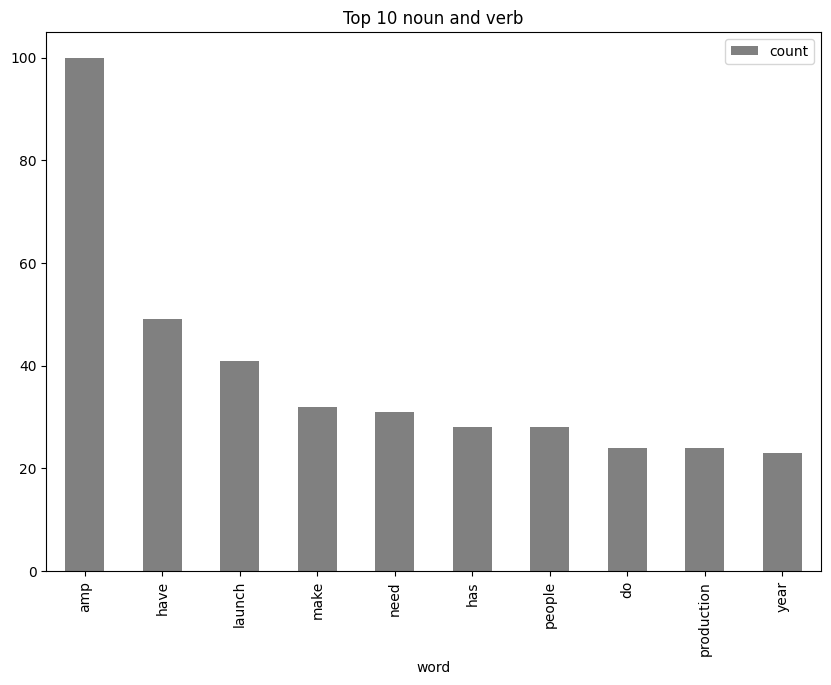

In [60]:
#bar plot for top 10 noun and verb
wd_df[0:10].plot.bar(x='word',figsize=(10,7),title='Top 10 noun and verb',color="gray")

# **Emotion Mining**

In [61]:
#importing afinn dictionary
afinn=pd.read_csv('Afinn.csv',encoding='latin-1')
afinn

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [62]:
#importing tweet dataset
musk=pd.read_csv('Elon_musk.csv',encoding='latin-1')
musk.drop('Unnamed: 0',axis=1,inplace=True)
musk.rename(columns={'Text':'text'},inplace=True)

In [63]:
musk=[text.strip() for text in musk.text]
musk=[text for text in musk if text]
musk[25:45]

['@RationalEtienne @Adamklotz_ Starlink is a staggeringly difficult technical &amp; economic endeavor. However, if we don\x85 https://t.co/9Z8Ac6skqx',
 '@RationalEtienne @Adamklotz_ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or\x85 https://t.co/7J1c92hdjl',
 '@ID_AA_Carmack Lowest cost per ton of carbon sequestered, net of value of any product made. \n\nMust be scalable to g\x85 https://t.co/XMyI7qWSgw',
 '@Adamklotz_ It\x92s meant to be the same price in all countries. Only difference should be taxes &amp; shipping.',
 '@tobyliiiiiiiiii This is intended for Earth, but there may be some ideas that apply to Mars too',
 '@CryptoShrikar @CoinDesk @Tesla @Dan_Z_Palmer <U+0001F923><U+0001F923>',
 'XPrize team will manage the $100M carbon capture prize https://t.co/fSw5IanL0r',
 '@SRuhle Everyone at Tesla receives stock. \n\nMy comp is all stock/options, which I do not take off the table. \n\nThat\x92s what you\x92re missing.',
 'Back to work I go',
 

In [64]:
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences=tokenize.sent_tokenize(''.join(musk))
sentences[25:45]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['@AstroJordy YesLessons learnedOf Earth and MarsTime to tell the story of Tesla &amp; SpaceX@TheOnion Have you read @TheBabylonBee?',
 'It\x92s great!',
 '!The Second Last Kingdom https://t.co/Je4EI88HmV@DumDin7 @Grimezsz Haven\x92t heard that name in years@Grimezsz DogecakeYOLT\n\nhttps://t.co/cnOf9yjpF1@Kristennetten That\x92s Damian@Kristennetten Yeah@OwenSparks_ SureThe great thing about restaurants is that you get to hang out with strangers!',
 '- SJMThe future currency of Earth@redlineshifter Just a scratchMuch wow!',
 '@RationalEtienne <U+0001F5A4>@wonderofscience Destiny@RenataKonkoly @Teslarati @woodhaus2 Franz was essential@Erdayastronaut @josh_bickett @ajtourville @SpaceX That said, the ship landing burn has a clear solution.',
 'My greate\x85 https://t.co/e5Wikiugkz@Adamklotz_ @Erdayastronaut @josh_bickett @ajtourville @SpaceX Will still use hot gas maneuvering (RCS) thrusters,\x85 https://t.co/vsO9h4Ioed@Erdayastronaut @josh_bickett @ajtourville @SpaceX Higher Isp too@Erd

In [65]:
sent_df=pd.DataFrame(sentences,columns=['sentences'])
sent_df

sentences
0    @kunalb11 Im an alien@ID_AA_Carmack Ray traci...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated@teslacn Congra...
4                    Now on to the next for even more!
..                                                 ...
857  Everything weve ever sensed or thought has be...
858  @kenyanwalstreet Not actually a payout, just a...
859  It may never pay out, as the stock cant b
 ht...
860  Details Aug 28.AI symbiosis while u wait@vista...
861  @TeslaGong @PPathole Samwise Gamgee@PPathole A...

[862 rows x 1 columns]

In [66]:
affinity_scores=afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [67]:
sentiment_lexicons=affinity_scores

In [68]:
#calculate sentiment analysis
def calculate_sentiment(text:str=None):
  sent_score=0
  if text:
    sentences=nlp(text)
    print(sentences)
    for word in sentences:
      sent_score+=sentiment_lexicons.get(word.lemma_,0)
  return sent_score

# **Testing with different words**

In [69]:
calculate_sentiment(text='sad')

sad


-2

In [70]:
calculate_sentiment(text='tom is funny cat')

tom is funny cat


4

In [71]:
#applying sentiment_values on complete calculate_sentiment
sent_df['sentiment_values']=sent_df['sentences'].apply(calculate_sentiment)

@kunalb11 Im an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.
Have you tried it?
@joerogan @Spotify Great interview!
@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year.
Now on to the next for even more!
!Happy New Year of the Ox!
https://t.co/9WFKMYu2ojFrodo was the underdoge,
All thought he would fail,
Himself most of all.
https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed!
Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine Its getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is true p

In [72]:
sent_df.sort_values(by='sentiment_values').head(10)

sentences  sentiment_values
59   Also, the road to hell is mostly paved with ba...                -7
827  This is primarily an electrical/electronic (ch...                -7
609  Very ba
 https://t.co/tJsh1Exz1Q@justpaulinelo...                -6
332  Austin jobs now avaihttps://t.co/d0i2w8wNKGYes...                -4
859  It may never pay out, as the stock cant b
 ht...                -4
638  Occasional flights from land are ok, but frequ...                -4
576  Then static fire, checkouts, static fire, fly ...                -4
472  @tesladri @ChananBos @raytech247 @WholeMarsBlo...                -3
698  @TimFernholz So why is this madness acceptable...                -3
453  Pretty odd
 https://t.co/PPSorKWdI8@enn_nafnla...                -3

In [73]:
sent_df.sort_values(by='sentiment_values').tail(10)

sentences  sentiment_values
790  Giving each person money allows them to decid
...                 9
39   @thejackbeyer @NASASpaceflight Cryoproof, then...                 9
528  SN9 next month.Starship SN8 with rear body fla...                10
614  Its not useful for predicting the future, nor...                10
674  We just havent observed the
 https://t.co/mez...                12
170  Also, w
 https://t.co/IYdKttVsqk@cleantechnica...                12
607  Its
 https://t.co/IxhyT6NuiC@Teslarati Tesla ...                13
554  The open areas
 https://t.co/rabjKrtQlw@Save...                14
33   @ajtourville @Erdayastronaut @SpaceX Yes, but ...                14
99   @Erdayastronaut @SpaceX Was also thinking that...                16

In [74]:
#describe , the sentiment score for all review
sent_df['sentiment_values'].describe()

count    862.000000
mean       1.163573
std        2.480103
min       -7.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       16.000000
Name: sentiment_values, dtype: float64

In [75]:
sent_df.shape

(862, 2)

In [76]:
sent_df[sent_df['sentiment_values']>5].head()

sentences  sentiment_values
8   Tweets definitely do not represent real-world ...                 6
33  @ajtourville @Erdayastronaut @SpaceX Yes, but ...                14
39  @thejackbeyer @NASASpaceflight Cryoproof, then...                 9
42  The economy  making useful products &amp; pro...                 6
55  https://t.co/RZtkDzAewJ@LabPadre Passed initia...                 6

In [77]:
sent_df[sent_df['sentiment_values']<0].head()

sentences  sentiment_values
6   https://t.co/9WFKMYu2ojFrodo was the underdoge...                -2
9   https://t.co/3pWt@ajtourville Yes@BLKMDL3 @Rat...                -1
10  However, if we don
 https://t.co/9Z8Ac6skqx@Ra...                -2
15  Thats what youre missing.Back to work I go@C...                -2
20  https://t.co/UEEocOfcTbThe people have spoken ...                -3

In [78]:
sent_df[sent_df['sentiment_values']<0]['sentences'].tolist()[7]

'Car guesses drive direction based on what obstacles it sees, context &amp; nav map.'

In [79]:
sent_df['index']=range(0,len(sent_df))

In [80]:
sent_df=sent_df.iloc[:,[2,0,1]]

In [81]:
sent_df

index                                          sentences  \
0        0  @kunalb11 Im an alien@ID_AA_Carmack Ray traci...   
1        1                                 Have you tried it?   
2        2                @joerogan @Spotify Great interview!   
3        3  @gtera27 Doge is underestimated@teslacn Congra...   
4        4                  Now on to the next for even more!   
..     ...                                                ...   
857    857  Everything weve ever sensed or thought has be...   
858    858  @kenyanwalstreet Not actually a payout, just a...   
859    859  It may never pay out, as the stock cant b
 ht...   
860    860  Details Aug 28.AI symbiosis while u wait@vista...   
861    861  @TeslaGong @PPathole Samwise Gamgee@PPathole A...   

     sentiment_values  
0                   0  
1                   0  
2                   3  
3                   4  
4                   0  
..                ...  
857                 2  
858                 0  
859                -4  
860                -2  
861                 0  

[862 rows x 3 columns]

# **Visualization**

# **Displot Visualization**

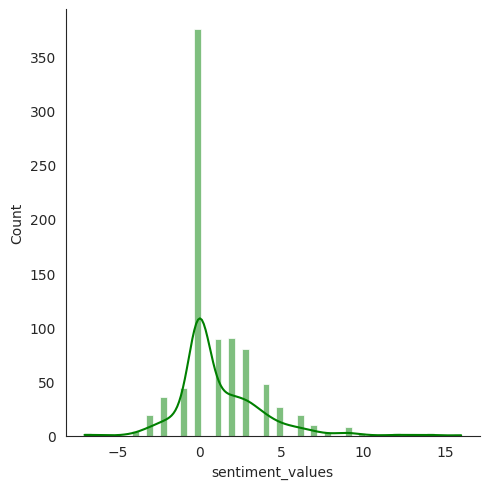

In [82]:
#displot
sns.set_style(style='white')
sns.displot(x='sentiment_values',data=sent_df,kde=True,color='green')
plt.show()

# **Scatterplot Visualization**

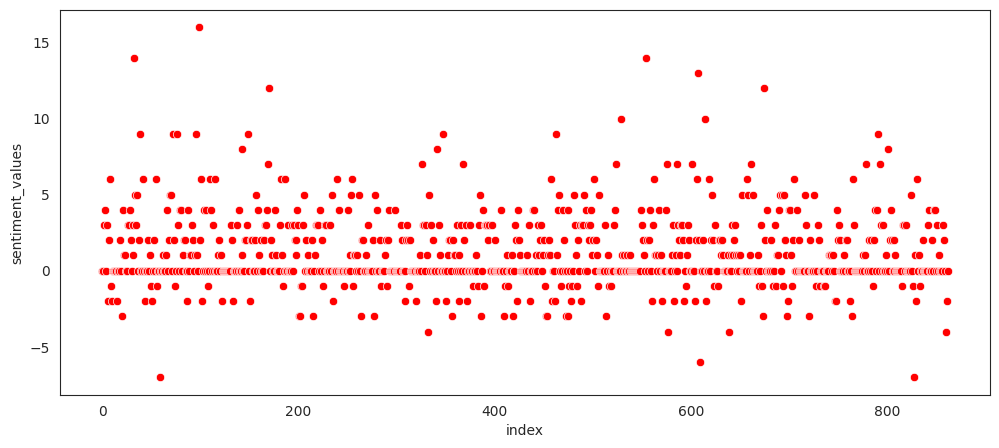

In [83]:
#scatterplot
plt.figure(figsize=(12,5))
sns.scatterplot(y='sentiment_values',x='index',data=sent_df,color='red')
plt.show()

# **Lineplot Visualization**

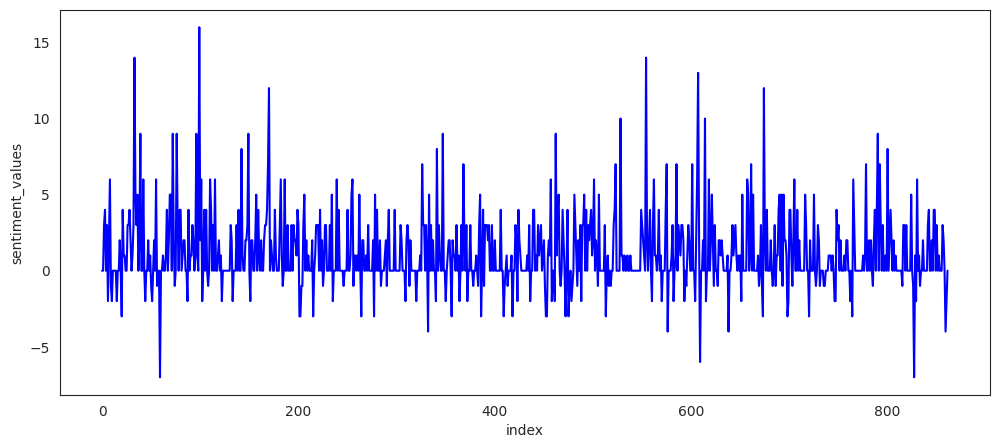

In [84]:
#lineplot
plt.figure(figsize=(12,5))
sns.lineplot(y='sentiment_values',x='index',data=sent_df,color='blue')
plt.show()

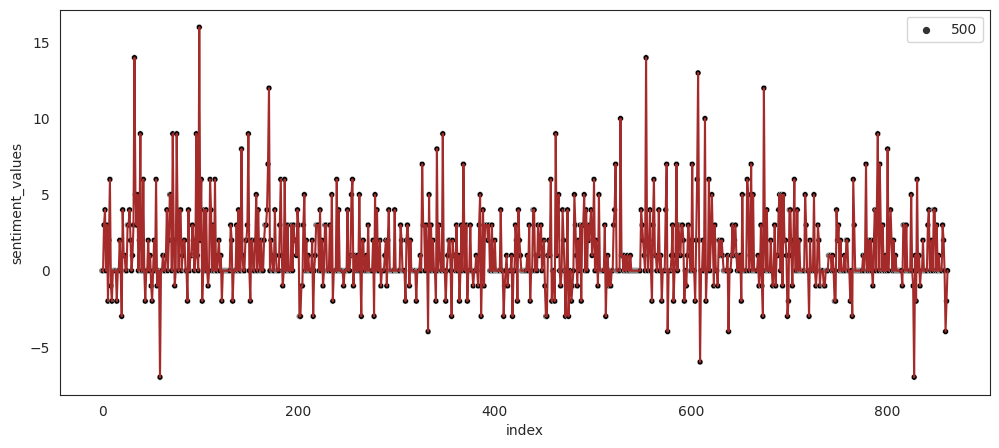

In [85]:
plt.figure(figsize=(12,5))
sns.lineplot(y='sentiment_values',x='index',data=sent_df,color='brown')
sns.scatterplot(y='sentiment_values',x='index',data=sent_df,color='black',size=500)
plt.show()

# **Checking the Sentiment**

In [86]:
#checking whether it is positive score or negative score or neutral score
def analysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  elif score>0:
    return 'Postive'

sent_df['analysis_score']=sent_df['sentiment_values'].apply(analysis)

In [87]:
sent_df

index                                          sentences  \
0        0  @kunalb11 Im an alien@ID_AA_Carmack Ray traci...   
1        1                                 Have you tried it?   
2        2                @joerogan @Spotify Great interview!   
3        3  @gtera27 Doge is underestimated@teslacn Congra...   
4        4                  Now on to the next for even more!   
..     ...                                                ...   
857    857  Everything weve ever sensed or thought has be...   
858    858  @kenyanwalstreet Not actually a payout, just a...   
859    859  It may never pay out, as the stock cant b
 ht...   
860    860  Details Aug 28.AI symbiosis while u wait@vista...   
861    861  @TeslaGong @PPathole Samwise Gamgee@PPathole A...   

     sentiment_values analysis_score  
0                   0        Neutral  
1                   0        Neutral  
2                   3        Postive  
3                   4        Postive  
4                   0        Neutral  
..                ...            ...  
857                 2        Postive  
858                 0        Neutral  
859                -4       Negative  
860                -2       Negative  
861                 0        Neutral  

[862 rows x 4 columns]

In [88]:
#determine review sentiment by using value_counts

In [89]:
sent_df['analysis_score'].value_counts()

Postive     381
Neutral     375
Negative    106
Name: analysis_score, dtype: int64

# **Conclusion**

In [90]:
#So here Positive value have high score.
#The data is consider as positive review.
#So we can conclude that,the Sentiment of the above tweet data is a Positive Sentiment.

In [91]:
# The tweet data has Positive Sentiment

# **So the tweet data has Positive Sentiment**

In [92]:
#completed

# **Completed**